In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/ personality.csv')
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [ ]:
print(df.columns)          # See column names
print(df.info())           # Check data types and missing values
print(df['Personality'].unique())  # Check unique labels in the target

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB
None
['Extrovert' 'Introvert']


In [ ]:
import numpy as np
df.fillna(method="ffill",inplace=True)
print(df.isnull().sum())

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


/tmp/ipython-input-477781754.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill",inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop("Personality",axis=1)
y=df["Personality"]
# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# If target is "Introvert"/"Extrovert", convert to 0/1
y = y.map({"Introvert": 0, "Extrovert": 1})
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score

lambdas = [0, 0.1, 1, 10, 100, 1000]  # λ values
train_losses, test_losses = [], []
weight_norms = []
accuracies_train =[]
accuracies_test = []
all_weights = []

for lam in lambdas:
    if lam == 0:
       # No regularization -> simulate by making C very large
        model = LogisticRegression(penalty='l2', C=1e10, solver='lbfgs', max_iter=1000)
    else:
         model = LogisticRegression(penalty='l2', C=1/lam, solver='lbfgs', max_iter=1000)


    model.fit(X_train, y_train)

    # Predictions
    y_train_prob = model.predict_proba(X_train)
    y_test_prob = model.predict_proba(X_test)

    # Cross-entropy loss
    train_losses.append(log_loss(y_train, y_train_prob))
    test_losses.append(log_loss(y_test, y_test_prob))

    # L2 norm of weights
    weight_norms.append(np.linalg.norm(model.coef_))

    # Save weights for plotting
    all_weights.append(model.coef_[0])

    # Accuracy
    accuracies_train.append(accuracy_score(y_train, model.predict(X_train)))
    accuracies_test.append(accuracy_score(y_test, model.predict(X_test)))
# Show results in text
for i, lam in enumerate(lambdas):
    print(f"λ = {lam}")
    print(f"  Train Loss: {train_losses[i]:.4f}, Test Loss: {test_losses[i]:.4f}")
    print(f"  Train Acc:  {accuracies_train[i]:.4f}, Test Acc:  {accuracies_test[i]:.4f}")
    print(f"  Weight Norm: {weight_norms[i]:.4f}")
    print("-"*40)


λ = 0
  Train Loss: 0.2493, Test Loss: 0.2814
  Train Acc:  0.9272, Test Acc:  0.9172
  Weight Norm: 3.6009
----------------------------------------
λ = 0.1
  Train Loss: 0.2493, Test Loss: 0.2816
  Train Acc:  0.9280, Test Acc:  0.9172
  Weight Norm: 3.5625
----------------------------------------
λ = 1
  Train Loss: 0.2495, Test Loss: 0.2839
  Train Acc:  0.9310, Test Acc:  0.9207
  Weight Norm: 3.2651
----------------------------------------
λ = 10
  Train Loss: 0.2560, Test Loss: 0.3004
  Train Acc:  0.9358, Test Acc:  0.9276
  Weight Norm: 1.8559
----------------------------------------
λ = 100
  Train Loss: 0.2722, Test Loss: 0.3253
  Train Acc:  0.9362, Test Acc:  0.9276
  Weight Norm: 0.5857
----------------------------------------
λ = 1000
  Train Loss: 0.2852, Test Loss: 0.3304
  Train Acc:  0.9362, Test Acc:  0.9276
  Weight Norm: 0.3709
----------------------------------------


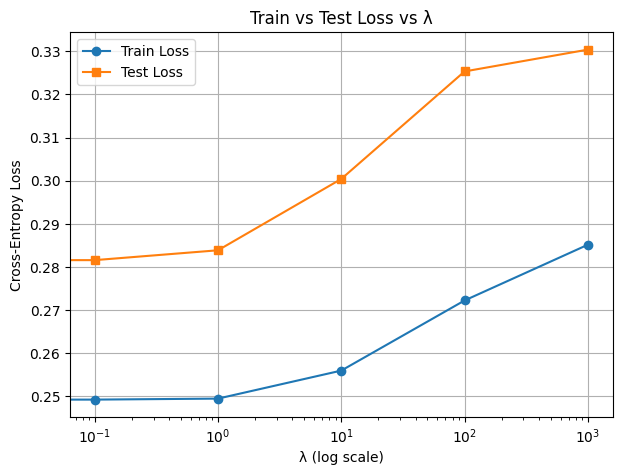

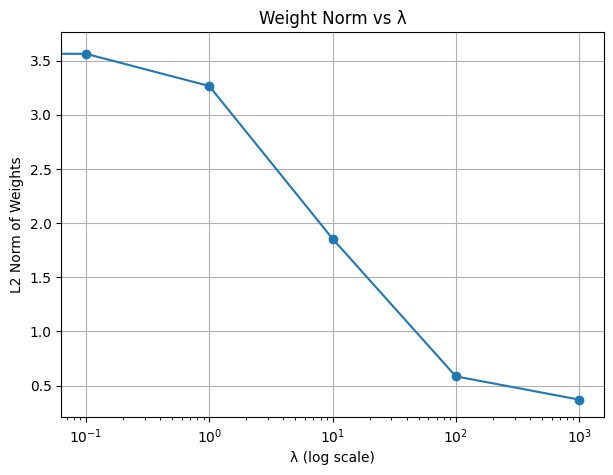

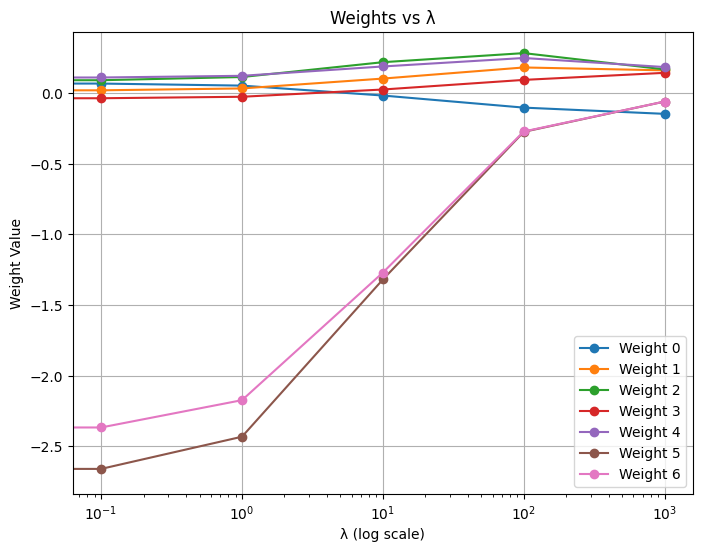

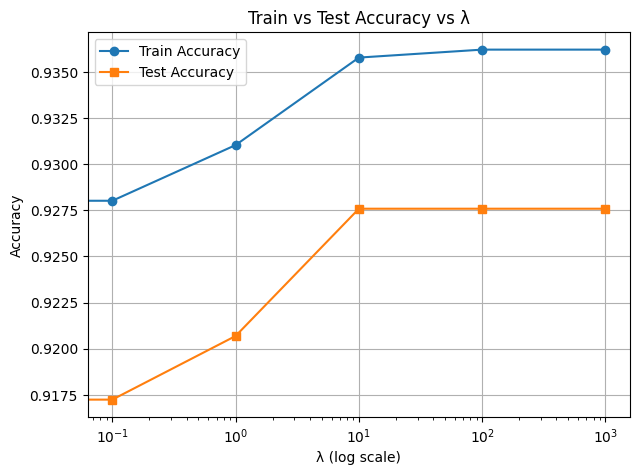

In [ ]:
# 1. Train/Test Loss vs λ (log scale)
plt.figure(figsize=(7,5))
plt.plot(lambdas, train_losses, marker='o', label='Train Loss')
plt.plot(lambdas, test_losses, marker='s', label='Test Loss')
plt.xscale('log')
plt.xlabel("λ (log scale)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Train vs Test Loss vs λ")
plt.legend()
plt.grid(True)
plt.show()
print()
# 2. Weight Norm vs λ
plt.figure(figsize=(7,5))
plt.plot(lambdas, weight_norms, marker='o')
plt.xscale('log')
plt.xlabel("λ (log scale)")
plt.ylabel("L2 Norm of Weights")
plt.title("Weight Norm vs λ")
plt.grid(True)
plt.show()
print()
# 3. Weights vs λ (one line per weight)
all_weights = np.array(all_weights)  # shape = (len(lambdas), num_features)
plt.figure(figsize=(8,6))
for j in range(all_weights.shape[1]):  # loop over features
    plt.plot(lambdas, all_weights[:, j], marker='o', label=f'Weight {j}')
plt.xscale('log')
plt.xlabel("λ (log scale)")
plt.ylabel("Weight Value")
plt.title("Weights vs λ")
plt.legend()
plt.grid(True)
plt.show()
print()
# 4. Accuracy vs λ
plt.figure(figsize=(7,5))
plt.plot(lambdas, accuracies_train, marker='o', label='Train Accuracy')
plt.plot(lambdas, accuracies_test, marker='s', label='Test Accuracy')
plt.xscale('log')
plt.xlabel("λ (log scale)")
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy vs λ")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Gaussian basis function transformer
def gaussian_basis_transform(X, sigma):
    # Ensure X is a 2D numpy float array
    X = np.array(X, dtype=float)
    n_samples, n_features = X.shape
    new_features = []

    # For each feature, create 5 Gaussian basis functions
    for j in range(n_features):
        means = np.linspace(-10, 10, 5)  # 5 means evenly spaced between -10 and 10
        for mu in means:
            phi = np.exp(-((X[:, j] - mu) ** 2) / (2 * sigma ** 2))  # Gaussian formula
            new_features.append(phi)

    return np.column_stack(new_features)  # stack into final feature matrix


# Example usage
sigmas = [0.1, 0.5, 1, 5, 10]
for sigma in sigmas:
    print(f"\nσ = {sigma}")

    # Transform training and test data
    X_train_gauss = gaussian_basis_transform(X_train.values, sigma)
    X_test_gauss = gaussian_basis_transform(X_test.values, sigma)

    print("Transformed train shape:", X_train_gauss.shape)
    print("Transformed test shape:", X_test_gauss.shape)

    model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)
    model.fit(X_train_gauss, y_train)

    acc_train = model.score(X_train_gauss, y_train)
    acc_test = model.score(X_test_gauss, y_test)
    print(f"Train Accuracy: {acc_train:.4f}, Test Accuracy: {acc_test:.4f}")



σ = 0.1
Transformed train shape: (2320, 35)
Transformed test shape: (580, 35)
Train Accuracy: 0.9259, Test Accuracy: 0.9172

σ = 0.5
Transformed train shape: (2320, 35)
Transformed test shape: (580, 35)
Train Accuracy: 0.9297, Test Accuracy: 0.9207

σ = 1
Transformed train shape: (2320, 35)
Transformed test shape: (580, 35)
Train Accuracy: 0.9353, Test Accuracy: 0.9276

σ = 5
Transformed train shape: (2320, 35)
Transformed test shape: (580, 35)
Train Accuracy: 0.9362, Test Accuracy: 0.9276

σ = 10
Transformed train shape: (2320, 35)
Transformed test shape: (580, 35)
Train Accuracy: 0.9362, Test Accuracy: 0.9276


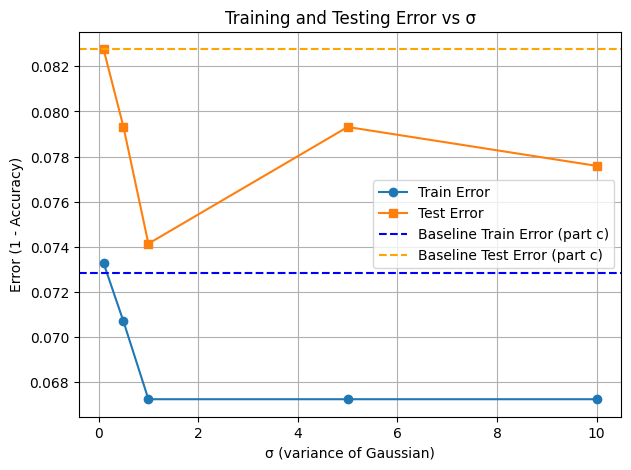

In [ ]:

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Gaussian basis function transformer
def gaussian_basis_transform(X, sigma):
    X = np.array(X, dtype=float)
    n_samples, n_features = X.shape
    new_features = []
    for j in range(n_features):
        means = np.linspace(-10, 10, 5)
        for mu in means:
            phi = np.exp(-((X[:, j] - mu) ** 2) / (2 * sigma ** 2))
            new_features.append(phi)
    return np.column_stack(new_features)


# Sigma values to test
sigmas = [0.1, 0.5, 1, 5, 10]
train_errors, test_errors = [], []

for sigma in sigmas:
    # Transform with Gaussian basis
    X_train_gauss = gaussian_basis_transform(X_train.values, sigma)
    X_test_gauss = gaussian_basis_transform(X_test.values, sigma)

    # Logistic Regression without regularization
    model = LogisticRegression(penalty=None, solver="lbfgs", max_iter=1000)
    model.fit(X_train_gauss, y_train)

    # Compute errors (1 - accuracy)
    train_err = 1 - accuracy_score(y_train, model.predict(X_train_gauss))
    test_err = 1 - accuracy_score(y_test, model.predict(X_test_gauss))

    train_errors.append(train_err)
    test_errors.append(test_err)

# --- Baseline model (part c, original features, no Gaussian) ---
baseline_model = LogisticRegression(penalty=None, solver="lbfgs", max_iter=1000)
baseline_model.fit(X_train, y_train)

train_err_c = 1 - accuracy_score(y_train, baseline_model.predict(X_train))
test_err_c = 1 - accuracy_score(y_test, baseline_model.predict(X_test))

# --- Plot results ---
plt.figure(figsize=(7,5))
plt.plot(sigmas, train_errors, marker='o', label="Train Error")
plt.plot(sigmas, test_errors, marker='s', label="Test Error")

plt.axhline(y=train_err_c, color='blue', linestyle='--', label="Baseline Train Error (part c)")
plt.axhline(y=test_err_c, color='orange', linestyle='--', label="Baseline Test Error (part c)")

plt.xlabel("σ (variance of Gaussian)")
plt.ylabel("Error (1 - Accuracy)")
plt.title("Training and Testing Error vs σ")
plt.legend()
plt.grid(True)
plt.show()
